# **Automatidata project: Regression Analysis**

## TASK

The purpose of this project is to build regression model to predict taxi fares using existing data that was collected over the course of a year.

The goal is to build a multiple linear regression model and evaluate the model. The following activities are conducted:

 1. Data Exploration
 2. Data Manuplation
 3. Feature Engineering
 4. Isolation of Modeling Variables
 5. Understanding the Relationship of Features with Target
 6. Data Pre-processing
 7. Model Construction
 8. Model Evaluation and Result
 9. Checking Model Performance on Full Dataset

In [1]:
# Data manipulation packages
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta

# Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error, confusion_matrix

In [2]:
df=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

## 1. Data Exploration

In [3]:
def df_analyze(dataset):
    """
    Function is utilized to get basic descriptive stats from dataframes.
    """
    print("1. THE SHAPE OF DATASET")
    print("-------------------------")
    print(f"Number of rows: {dataset.shape[0]} \nNumber of features: {dataset.shape[1]}")
    print('\n')
    print("2. MISSING AND DUPLICATED VALUES")
    print("-------------------------")    
    for col in df.columns:
        if dataset.isna().any().sum()==0:
            print(f"Data set doesn't contain any missing value")
            break
        elif dataset[col].isna().sum()>0:
            print(f"Number of nulls in {col} column is {dataset[col].isna().sum()}")
    print(f"Data set has {dataset.duplicated().sum()} duplication.")
    print('\n')
    print("3. DATA TYPES")
    print("-------------------------")
    print(dataset.dtypes)
    print('\n')
    print("4. SUMMARY STATISTICS")
    print("-------------------------")
    pd.set_option('display.max_columns', None)
    display(dataset.describe())

In [4]:
df_analyze(df)

1. THE SHAPE OF DATASET
-------------------------
Number of rows: 22699 
Number of features: 18


2. MISSING AND DUPLICATED VALUES
-------------------------
Data set doesn't contain any missing value
Data set has 0 duplication.


3. DATA TYPES
-------------------------
Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object


4. SUMMARY STATISTICS
-------------------------


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


**Important note:** Some things stand out from this table of summary statistics. For instance, there are clearly some outliers in several variables, like `tip_amount` (\$200) and `total_amount` (\$1,200). Also, a number of the variables, such as `mta_tax`, seem to be almost constant throughout the data, which would imply that they would not be expected to be very predictive.

## 2. Data Manuplation

**Converting data types of pickup and dropoff features to `datetime`.**

In [5]:
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

**Outlier Handling: Imputations**

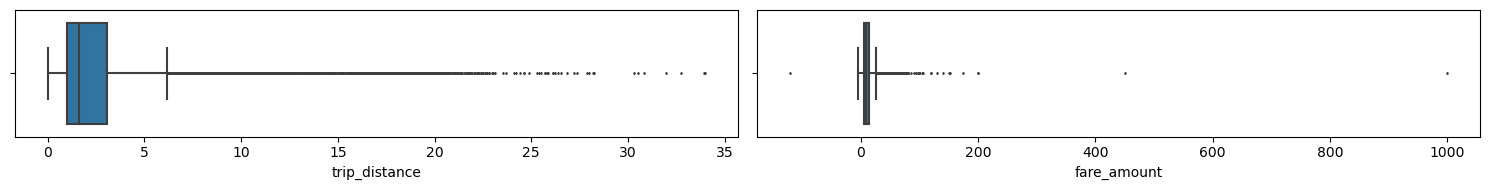

In [6]:
fig, axes=plt.subplots(1,2, figsize=(15,2))
fig1=sns.boxplot(data=df, x='trip_distance', fliersize=True, ax=axes[0])
fig2=sns.boxplot(data=df, x='fare_amount', fliersize=True, ax=axes[1])
plt.tight_layout()
plt.show()

In [7]:
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [8]:
sum(df['trip_distance']==0)

148

In [9]:
def column_imputer(column_list, iqr_factor):
    
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        df.loc[df[col]<0, col]=0
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        Upper_limit=Q3+iqr_factor*IQR
        df.loc[df[col]>Upper_limit, col]=Upper_limit
        print("Column name:", col)
        print('Q3:', round(Q3,3))
        print('upper_threshold:', round(Upper_limit,3))
        print(df[col].describe())
        print('\n')

In [10]:
column_imputer(column_list=['fare_amount'], iqr_factor=6)

Column name: fare_amount
Q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64




**Checking `Trip Distance` column**

In [11]:
print(f"Last 10 records of sorted trip distance column:\n\n {sorted(set(df['trip_distance']))[:10]}")
print('\n')
print(f"Number of records with 0 km distance are {(df['trip_distance']==0).sum()}.")

Last 10 records of sorted trip distance column:

 [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]


Number of records with 0 km distance are 148.


**Important Note**

- The analysis of `trip distance` column revealed that 148 trips have 0 km distance. The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind.
- 148 out of ~23,000 rides is relatively insignificant. You could impute it with a value of 0.01, but it's unlikely to have much of an effect on the model. Therefore, the trip_distance column will remain untouched with regard to outliers.

## 3. Feature Engineering

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

For this purpose the following features should be engineered:
- `duration`
- `pickup_dropoff`
- `mean_distance`
- `mean_duration`
- `day`
- `month`
- `rush hour`

**The `duration` column**

In [12]:
df['duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/np.timedelta64(1,'m')
column_imputer(['duration'],6)

Column name: duration
Q3: 18.383
upper_threshold: 88.783
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64




**The `pickup_dropoff` column**: Combination of pickup and dropoff location IDs

In [13]:
df['pickup_dropoff']=df['PULocationID'].astype(str)+' '+df['DOLocationID'].astype(str)
df[['pickup_dropoff']].head()

,pickup_dropoff
0,100 231
1,186 43
2,262 236
3,188 97
4,4 112


**The `mean_distance` and `mean_duration` columns:** The columns are engineered because it gives insight about the average distance and duration for unique rides.

In [14]:
# Mean Distance
grouped=df.groupby('pickup_dropoff')[['trip_distance']].mean()
grouped_dict=grouped.to_dict()
grouped_dict=grouped_dict['trip_distance']
df['mean_distance']=df['pickup_dropoff']
df['mean_distance']=df['mean_distance'].map(grouped_dict)

# Mean Duration
grouped_1=df.groupby('pickup_dropoff')[['duration']].mean(numeric_only=True)
grouped_dict_1=grouped_1.to_dict()
grouped_dict_1=grouped_dict_1['duration']
df['mean_duration']=df['pickup_dropoff']
df['mean_duration']=df['mean_duration'].map(grouped_dict_1)

# Confirming the result for pickup and drop off with location ID of 100 and 231 respectively 
display(df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']])
display(df[(df["PULocationID"]==100) & (df['DOLocationID']==231)][['mean_duration']])


,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Creating `day` and `month` columns

In [15]:
df['day']=df['tpep_pickup_datetime'].dt.day_name().str.lower()
df['month']=df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

`rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [16]:
df['rush_hour']=df['tpep_pickup_datetime'].dt.hour
df.loc[df['day'].isin(['saturday','sunday']), 'rush_hour']=0
df.head()
def rush_hour_func(x):
    if 6<=x['rush_hour']<10:
        value = 1
    elif 16<=x['rush_hour']<20:
        value = 1
    else:
        value=0
    return value

df.loc[(df.day != 'sunday') & (df.day != 'saturday'), 'rush_hour'] = df.apply(rush_hour_func, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


## 4. Isolation of modeling variables

The selected featues are given below:
- `VendorID`
- `Passenger Count`
- `Fare Amount`
- `Mean Distance`
- `Mean Duration`
- `Rush Hour`

In [17]:
df2=df.copy()
df2=df2.drop(columns=['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)
df2.head()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,22.847222,0
1,1,1,16.0,3.108889,24.470370,0
2,1,1,6.5,0.881429,7.250000,1
3,2,1,20.5,3.700000,30.250000,0
4,2,1,16.5,4.435000,14.616667,0


**Investigating the pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`**

/Users/vagifaliyev/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


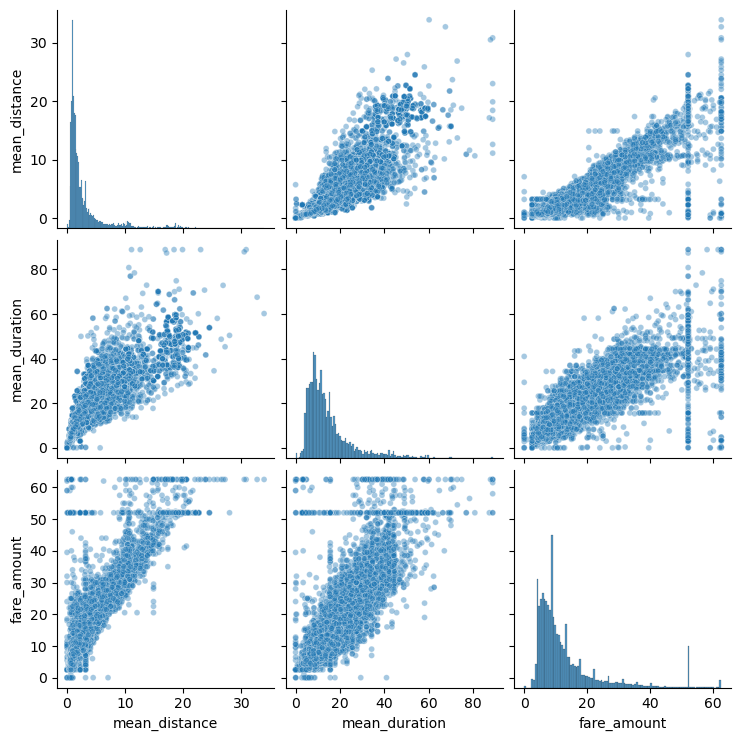

In [18]:
fig=sns.pairplot(data=df2[['mean_distance','mean_duration','fare_amount']], plot_kws={'alpha':0.4, 'size':5})

**Note:** These variables all show linear correlation with each other. The correlation matrix and heatmap can help to understand the degree of linearity.

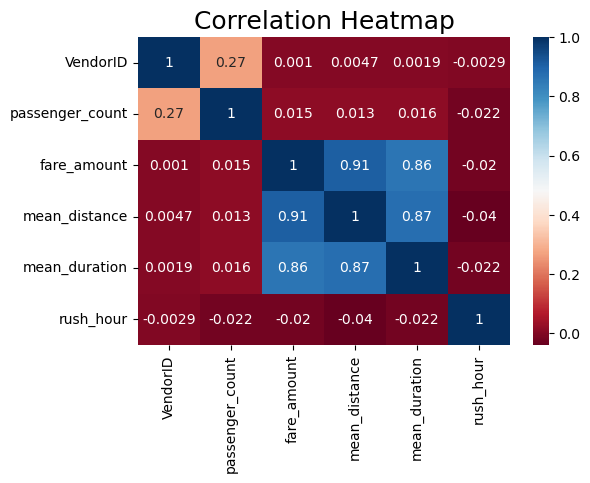

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=18)
plt.show()

**Important Note:** `mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount` They're also both correlated with each other, with a Pearson correlation of 0.87.

Recall that highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

### 4.1. Understanding the Relationship of Features with Target

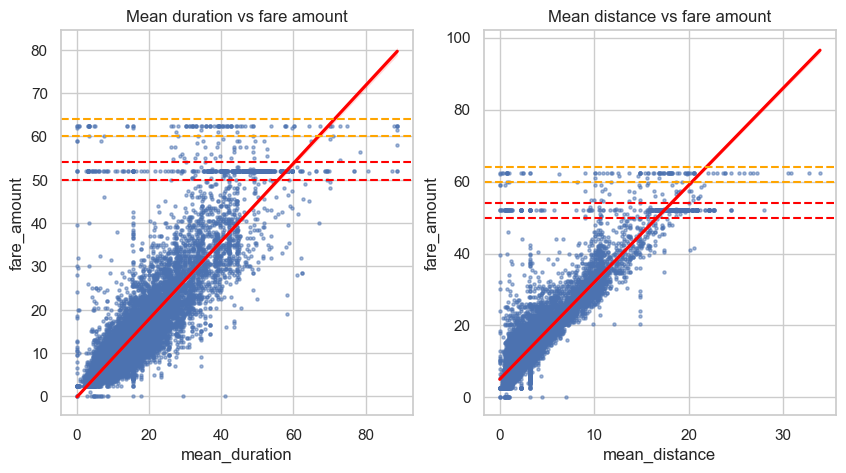

In [20]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'}, ax=axes[0])
sns.regplot(x=df['mean_distance'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'}, ax=axes[1])
axes[0].set_title('Mean duration vs fare amount')
axes[1].set_title('Mean distance vs fare amount')

# Highlighting the anomaly
axes[0].axhline(y=64, linestyle='--', color='orange')
axes[0].axhline(y=60, linestyle='--', color='orange')
axes[0].axhline(y=54, linestyle='--', color='red')
axes[0].axhline(y=50, linestyle='--', color='red')
axes[1].axhline(y=64, linestyle='--', color='orange')
axes[1].axhline(y=60, linestyle='--', color='orange')
axes[1].axhline(y=54, linestyle='--', color='red')
axes[1].axhline(y=50, linestyle='--', color='red')

plt.show()


**Note:** As it seen from the graphs given above the dashed horizontal lines in fare amount surrounds 52 USD and 62.5 USD. 62.5 USD is totaly okay by considering the imputation conducted above, but 52 USD needs further exploration.

In [21]:
df[df[['fare_amount']]>50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

**Note:** The top repeated fare amount is either 52 USD or 62.5 USD (due to imputation). So let's examine the first 30 records with fare amount of \$52

In [22]:
pd.set_option('display.max_columns', None)
df[(df['fare_amount']==52)].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


It seems that almost all of the trips in the first 30 rows where the fare amount was \$52 either begin or end at location 132 and all records' `RatecodeID` is 2. The following check can confirm it:

In [23]:
print(df[df['fare_amount']==52]['PULocationID'].agg('mode'))
print(df[df['fare_amount']==52]['DOLocationID'].agg('mode'))

0    132
Name: PULocationID, dtype: int64
0    132
Name: DOLocationID, dtype: int64


**Note:** The data dictionary says that RatecodeID of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A Google search for "new york city taxi flat rate $52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

## 5. Data Preprocessing

In [24]:
df_analyze(df2)

1. THE SHAPE OF DATASET
-------------------------
Number of rows: 22699 
Number of features: 6


2. MISSING AND DUPLICATED VALUES
-------------------------
Data set doesn't contain any missing value
Data set has 2055 duplication.


3. DATA TYPES
-------------------------
VendorID             int64
passenger_count      int64
fare_amount        float64
mean_distance      float64
mean_duration      float64
rush_hour            int64
dtype: object


4. SUMMARY STATISTICS
-------------------------


,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,12.897913,2.913313,14.460555,0.296753
std,0.496838,1.285231,10.541137,3.558993,10.080913,0.456837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,1.010000,8.031481,0.000000
50%,2.000000,1.000000,9.500000,1.620000,11.556667,0.000000
75%,2.000000,2.000000,14.500000,3.115625,17.321667,1.000000
max,2.000000,6.000000,62.500000,33.920000,88.783333,1.000000


**Target variable:** 
- `fare_amount`

**Predictors:**
- `VendorID`
- `Passenger Count`
- `Mean Distance`
- `Mean Duration`
- `Rush Hour`

In [25]:
X=df2.drop(columns='fare_amount')
y=df2['fare_amount']
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


Dummy encode categorical variables

In [26]:
X['VendorID']=X['VendorID'].astype(str)
X=pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,True
1,1,3.108889,24.470370,0,False
2,1,0.881429,7.250000,1,False
3,1,3.700000,30.250000,0,True
4,1,4.435000,14.616667,0,True


#### Split data into training and test sets

The test set should contain 20% of the total samples.

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [28]:
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [29]:
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train_scaled: (18159, 5)
Shape of y_train: (18159,)
Shape of X_test_scaled: (4540, 5)
Shape of y_test: (4540,)


## 6. Model Construction

The Utilized Models are:

- Linear Regression
- Ridge Regression
- Lasso Regression
- RandomForestRegressor
- GradientBoostingRegressor

### 6.1. Linear Regression

In [30]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
Model_names=[]
R2_train=[]
R2_test=[]
MSE_test=[]

def prediction_model(model, model_name):
    
    Model_names.append(model_name)
    
    model.fit(X_train_scaled,y_train)
    y_pred_train=model.predict(X_train_scaled)
    R2_train_model=r2_score(y_train, y_pred_train)
    R2_train.append(round(R2_train_model,3))
    
    
    y_pred_test=model.predict(X_test_scaled)
    R2_test_model=r2_score(y_test, y_pred_test)
    R2_test.append(round(R2_test_model,3))
    MSE=mean_squared_error(y_test, y_pred_test)
    MSE_test.append(MSE)
    print("                Model's Summary")
    print('\n')
    print(f"1. Name of Model: {model_name}")
    print('\n')
    print("2. Model Scores")
    print("----------------------")
    print(f"Train R2-score: {round(R2_train_model,4)}")
    print(f"Test R2-score: {round(R2_test_model,4)}")
    print(f"MSE test: {round(MSE,4)}")
    
    
    fig, axes=plt.subplots(1,2,figsize=(15,5))
    sns.scatterplot(x=y_test, y=y_pred_test, ax=axes[0], color='g')
    axes[0].set_title('y_test vs y_pred_test')
    axes[0].set_xlabel('y_test')
    axes[0].set_ylabel('y_pred')
    
    sns.distplot((y_train-y_pred_train), hist=True, ax=axes[1])
    axes[1].set_title('Residual Plot of Train Sample')

                Model's Summary


1. Name of Model: Linear Regression


2. Model Scores
----------------------
Train R2-score: 0.8398
Test R2-score: 0.8683
MSE test: 14.3265


/var/folders/2p/d9g_821543d129t2qvvm_pqc0000gn/T/ipykernel_1845/1376307020.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train), hist=True, ax=axes[1])


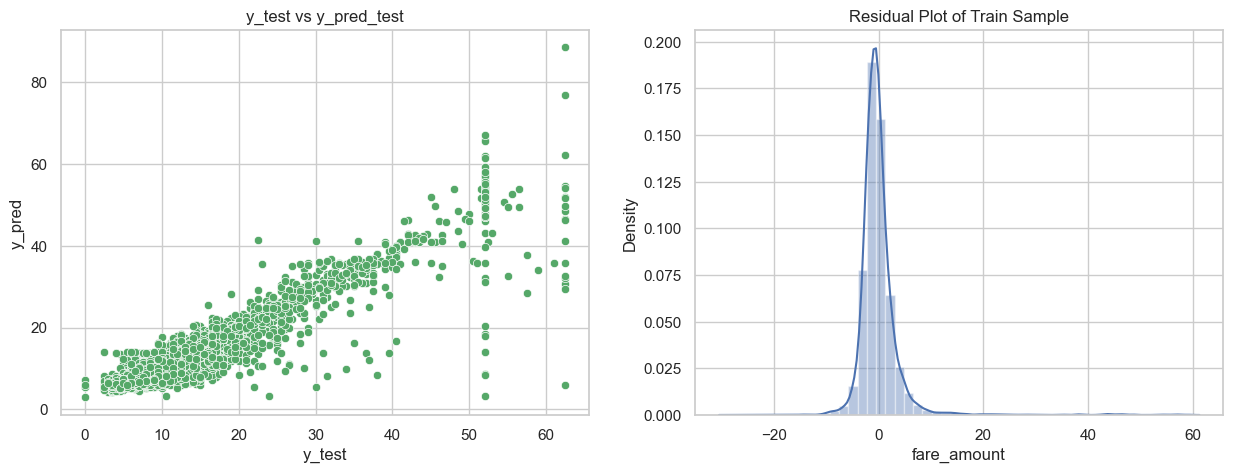

In [32]:
prediction_model(model=lr, model_name='Linear Regression')

### 6.2. Ridge Regression

In [33]:
rg=Ridge()
alpha=np.logspace(-3,3, num=14)
rg_rs=RandomizedSearchCV(estimator=rg, param_distributions=dict(alpha=alpha))

                Model's Summary


1. Name of Model: Ridge Regression


2. Model Scores
----------------------
Train R2-score: 0.8398
Test R2-score: 0.8683
MSE test: 14.3265


/var/folders/2p/d9g_821543d129t2qvvm_pqc0000gn/T/ipykernel_1845/1376307020.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train), hist=True, ax=axes[1])


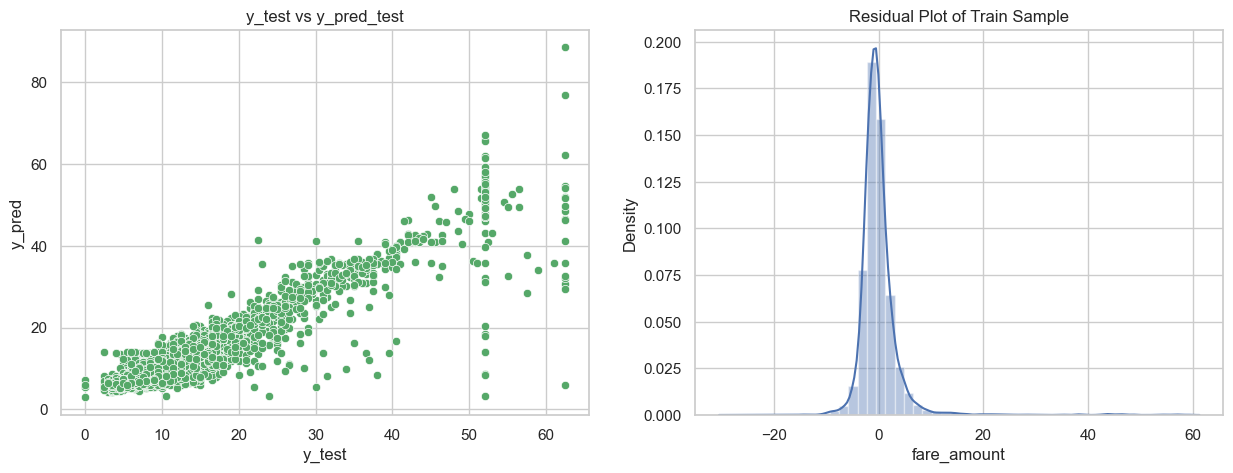

In [34]:
prediction_model(model=rg_rs, model_name='Ridge Regression')

### 6.3. Lasso Regression

In [35]:
ls=Lasso()
alpha=np.logspace(-3,3, num=14)
ls_rs=RandomizedSearchCV(estimator=ls, param_distributions=dict(alpha=alpha))

                Model's Summary


1. Name of Model: Lasso Regression


2. Model Scores
----------------------
Train R2-score: 0.8398
Test R2-score: 0.8682
MSE test: 14.3276


/var/folders/2p/d9g_821543d129t2qvvm_pqc0000gn/T/ipykernel_1845/1376307020.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train), hist=True, ax=axes[1])


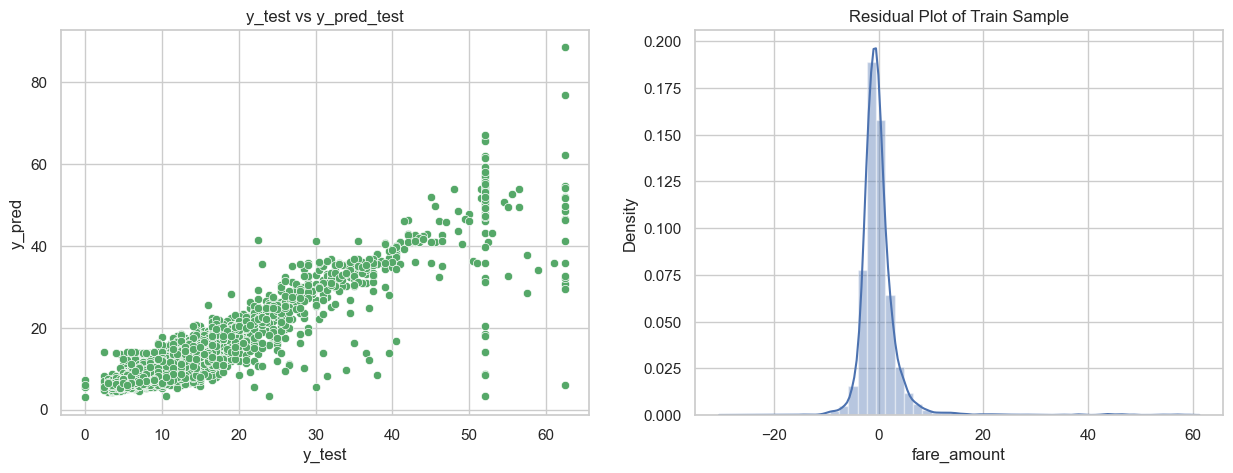

In [36]:
prediction_model(model=ls_rs, model_name='Lasso Regression')

### 6.4. Random Forest

In [37]:
list(range(500,1000,100))

[500, 600, 700, 800, 900]

In [38]:
rf=RandomForestRegressor()
max_features=['auto','sqrt']
param_grid={'n_estimators':list(range(500,1000,100)),
           'max_depth':[4,8],
           'min_samples_split':[4,6,8],
           'min_samples_leaf':[1,2,5,7],
           'max_features':max_features}

rf_rs=RandomizedSearchCV(estimator=rf, param_distributions=param_grid)

/Users/vagifaliyev/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vagifaliyev/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vagifaliyev/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/vagifaliyev/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_cons

                Model's Summary


1. Name of Model: Random Forest


2. Model Scores
----------------------
Train R2-score: 0.868
Test R2-score: 0.8776
MSE test: 13.3149


/var/folders/2p/d9g_821543d129t2qvvm_pqc0000gn/T/ipykernel_1845/1376307020.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train), hist=True, ax=axes[1])


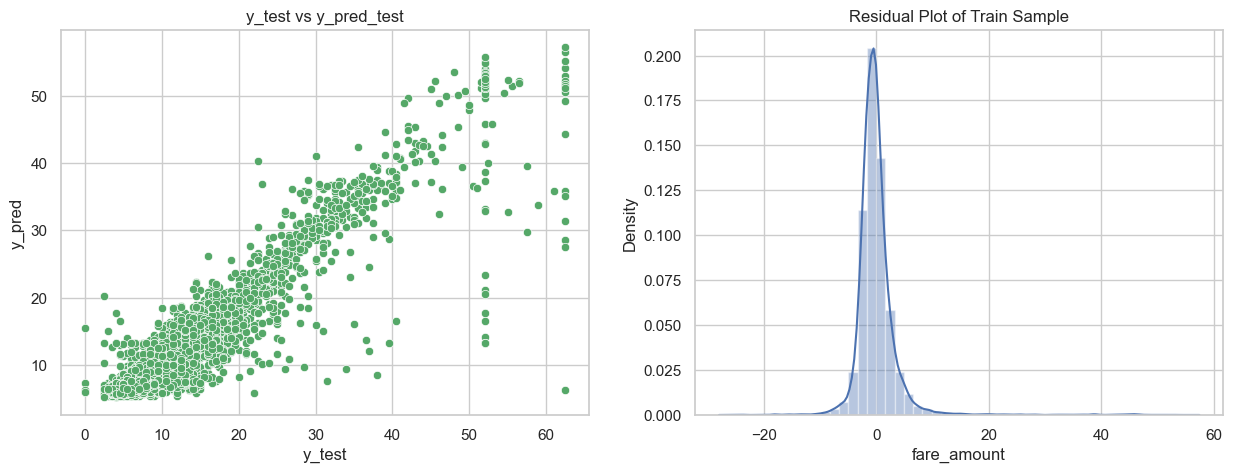

In [39]:
prediction_model(model=rf_rs, model_name="Random Forest")

### 6.5. Gradient Boosting

In [40]:
gb=GradientBoostingRegressor()
learning_rate=[0.001,0.01,0.1,0.2]
max_features=['auto','sqrt']
param_grid={'learning_rate':learning_rate,
            'n_estimators':list(range(500,1000,100)),
           'max_depth':[4,8],
           'min_samples_split':[4,6,8],
           'min_samples_leaf':[1,2,5,7],
           'max_features':max_features}

gb_rs=RandomizedSearchCV(estimator=gb, param_distributions=param_grid)

/Users/vagifaliyev/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vagifaliyev/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vagifaliyev/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/vagifaliyev/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constr

                Model's Summary


1. Name of Model: Gradient Boosting


2. Model Scores
----------------------
Train R2-score: 0.8659
Test R2-score: 0.8799
MSE test: 13.0656


/var/folders/2p/d9g_821543d129t2qvvm_pqc0000gn/T/ipykernel_1845/1376307020.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train), hist=True, ax=axes[1])


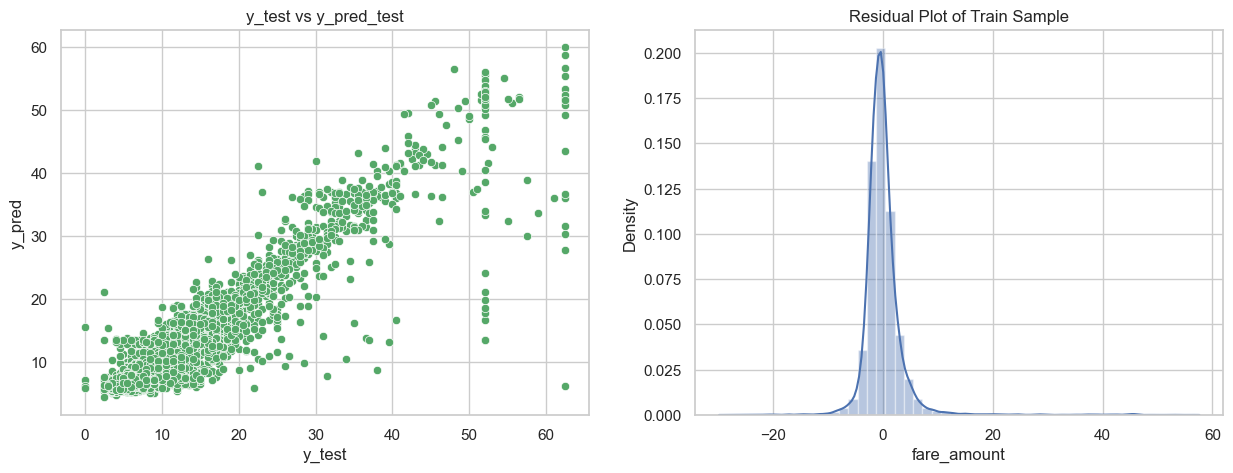

In [41]:
prediction_model(model=gb_rs, model_name="Gradient Boosting")

## 7. Model Evaluation and Result

In [42]:
model_result={"Model Name": Model_names,
            "R2 train": R2_train,
            "R2 test": R2_test,
            "MSE of test": MSE_test}
Models=pd.DataFrame(model_result).sort_values(by="MSE of test", ascending=False, ignore_index=True)
Models

,Model Name,R2 train,R2 test,MSE of test
0,Lasso Regression,0.840,0.868,14.327613
1,Ridge Regression,0.840,0.868,14.326542
2,Linear Regression,0.840,0.868,14.326454
3,Random Forest,0.868,0.878,13.314883
4,Gradient Boosting,0.866,0.880,13.065581


**Important Note**: The result shows that **champion model** is Gradient Boosting with lowest cost (12.78).

### 7.1. Result

In [43]:
gb_rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features='sqrt',
                          min_samples_leaf=7, min_samples_split=6,
                          n_estimators=500)

In [44]:
gb_tuned=GradientBoostingRegressor()
learning_rate=[0.01]
max_features=['sqrt']
param_grid={'learning_rate':learning_rate,
            'n_estimators':[700],
           'max_depth':[4],
           'min_samples_split':[4],
           'min_samples_leaf':[2],
           'max_features':max_features}

gb_tuned_rs=RandomizedSearchCV(estimator=gb_tuned, param_distributions=param_grid)

In [45]:
%%time
gb_tuned_rs.fit(X_train_scaled,y_train)

/Users/vagifaliyev/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


CPU times: user 15.4 s, sys: 3.7 ms, total: 15.4 s
Wall time: 15.5 s


RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01],
                                        'max_depth': [4],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [4],
                                        'n_estimators': [700]})

In [46]:
y_predicted=gb_tuned_rs.predict(X_test_scaled)

In [47]:
mean_squared_error(y_test, y_predicted)

12.775352809147527

In [48]:
result=pd.DataFrame({"actual": y_test, "predicted": y_predicted})
result['residual']=result['actual']-result['predicted']
result.head()

,actual,predicted,residual
5818,14.0,11.874947,2.125053
18134,28.0,16.137414,11.862586
4655,5.5,6.878273,-1.378273
7378,15.5,16.092245,-0.592245
13914,9.5,10.269141,-0.769141


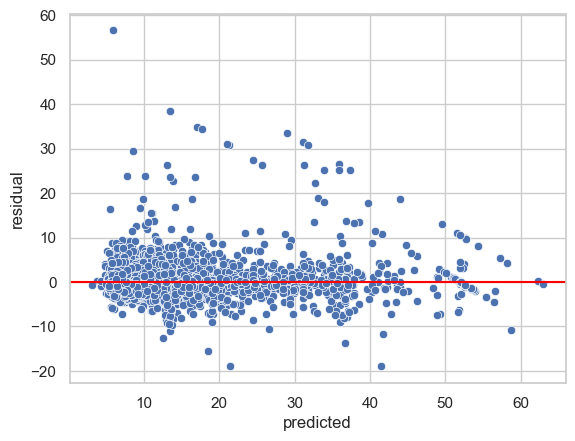

In [49]:
fig=sns.scatterplot(data=result, x='predicted', y='residual')
plt.axhline(y=0, color='red')

**Important Note:** The model's residuals are evenly distributed above and below zero.

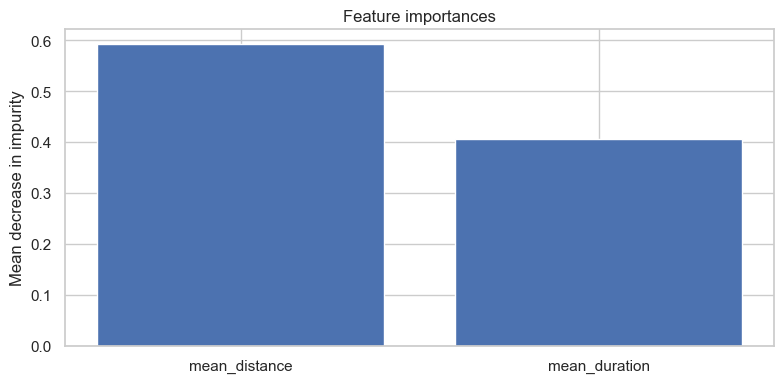

In [50]:
importance=gb_tuned_rs.best_estimator_.feature_importances_
gb_importance=pd.Series(importance, index=X_test.columns).sort_values(ascending=False)[:2]

fig, ax = plt.subplots(figsize=(8,4))
plt.bar(x=gb_importance.index, height=gb_importance)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

## 8. Checking Model Performance on Full Dataset

In [51]:
X_scaled=scaler.transform(X)
y_preds_full=gb_tuned_rs.predict(X_scaled)
y_preds_full

array([16.5402092 , 16.42364954,  6.62107944, ...,  5.9864196 ,
       11.51242042,  8.2141621 ])

In [52]:
print('R^2:', r2_score(y, y_preds_full))
print('MAE:', mean_absolute_error(y, y_preds_full))
print('MSE:', mean_squared_error(y, y_preds_full))
print('RMSE:',np.sqrt(mean_squared_error(y, y_preds_full)))

R^2: 0.8747254663242576
MAE: 2.0626717450843217
MSE: 13.919338623300474
RMSE: 3.7308629864014673


In [53]:
Models

,Model Name,R2 train,R2 test,MSE of test
0,Lasso Regression,0.840,0.868,14.327613
1,Ridge Regression,0.840,0.868,14.326542
2,Linear Regression,0.840,0.868,14.326454
3,Random Forest,0.868,0.878,13.314883
4,Gradient Boosting,0.866,0.880,13.065581


In [54]:
nyc_preds_means = df[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = y_preds_full
nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.540209
1,24.470370,3.108889,16.423650
2,7.250000,0.881429,6.621079
3,30.250000,3.700000,20.049591
4,14.616667,4.435000,15.328859


**Note:** The result is saved and will be utilized in final ml model.

In [59]:
nyc_preds_means.to_csv("nyc_preds_means.csv")